In this project my main goal is to make a model that predicts addiction score on social media based on other student metrics


I will start by analysing our given dataset, analyse every varaible and comparison between them

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Lucas\Desktop\projetos solo\students_socila_media_addiction\Students Social Media Addiction.csv")
# Display the first few rows to confirm import
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
df.describe()


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


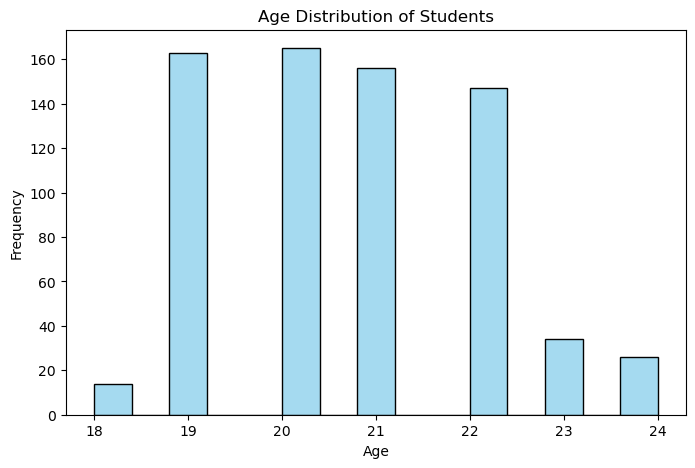

In [8]:
# Plot the age distribution of students

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15,color='skyblue')
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_28272\3797037298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


Gender
Female    353
Male      352
Name: count, dtype: int64

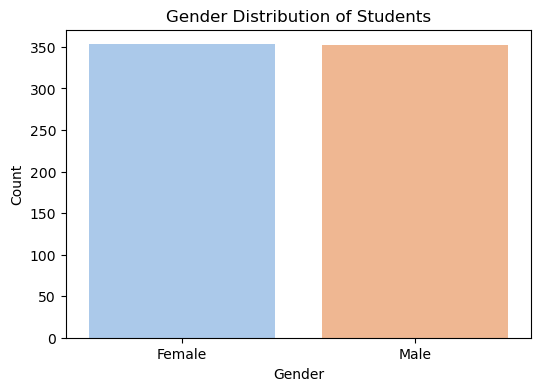

In [10]:
# Plot the gender distribution of students

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution of Students')
plt.xlabel('Gender')
plt.ylabel('Count')
# Count of students by gender
df['Gender'].value_counts()

age and gender are usefull variables btoh are balanced, eventhough there are less samples from stundents of ages 18 23 and 24, that should not be very relevant

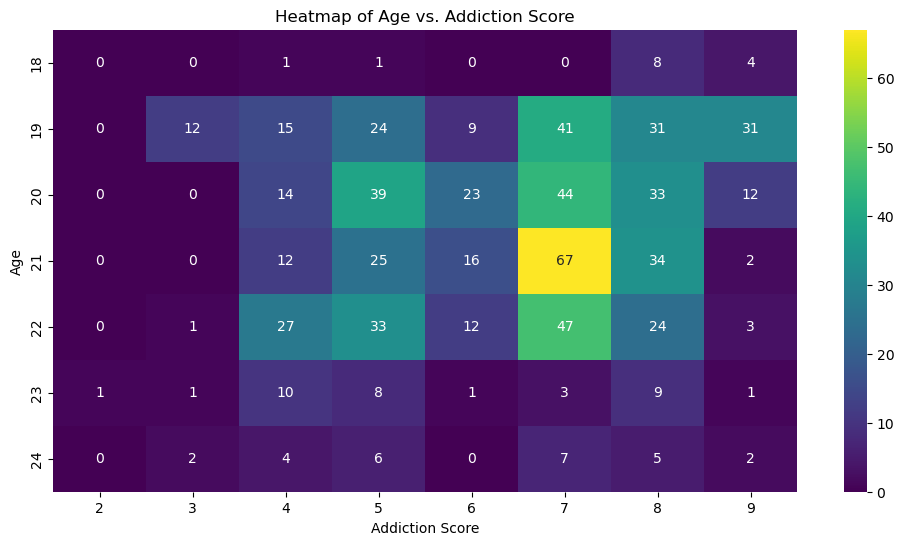

C:\Users\Lucas\AppData\Local\Temp\ipykernel_28272\2556796235.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Addicted Score')


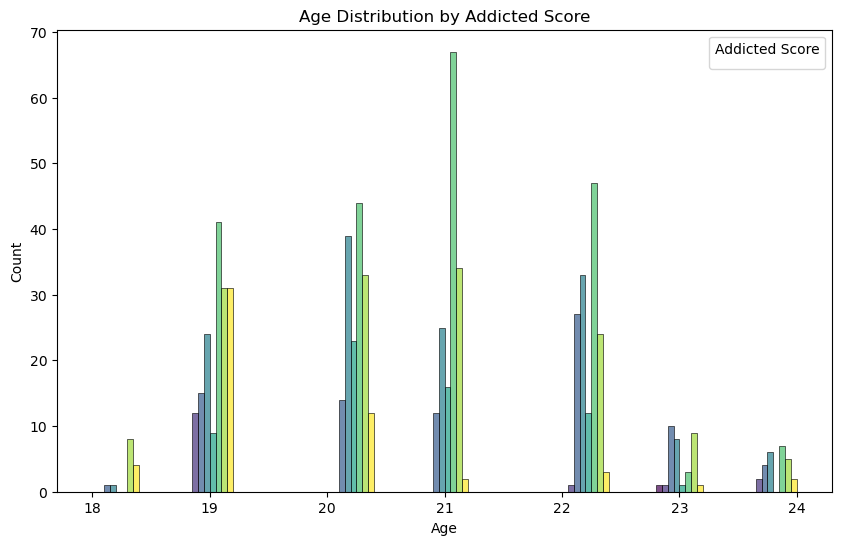

In [43]:
# Heatmap: Age vs. Addiction Score

# Create a pivot table (counts of students for each Age and Addicted_Score combination)
age_score_pivot = pd.crosstab(df['Age'], df['Addicted_Score'])

plt.figure(figsize=(12, 6))
sns.heatmap(age_score_pivot, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Age vs. Addiction Score')
plt.xlabel('Addiction Score')
plt.ylabel('Age')
plt.show()


# Age distribution for each Addicted_Score class

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Age',
    hue='Addicted_Score',
    multiple='dodge',
    bins=15,
    palette='viridis',
    alpha=0.7
)
plt.title('Age Distribution by Addicted Score')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Addicted Score')
plt.show()


18: students with this age, are more prone to be higly addicted, but the sample size is acctually very small.

19: this is the age that represents most students with an addicted score of 3, but also the age that represents the most students with high addictions  

20/21/22:hvae very simillar distributions, but with the age growth there seems to be a decrese of addiction

23: most students are not higly addicted, probably more focused on finishing their course.

24: very evenly distributed.


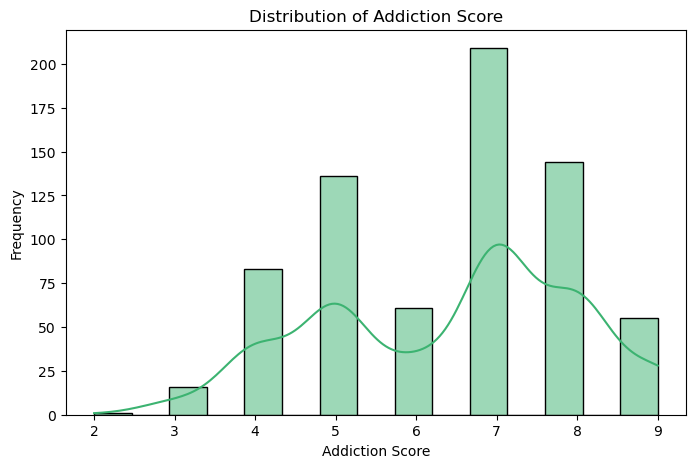

count    705.000000
mean       6.436879
std        1.587165
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Addicted_Score, dtype: float64

In [18]:
# Plot the distribution of Addiction Score

plt.figure(figsize=(8, 5))
sns.histplot(df['Addicted_Score'], bins=15, kde=True, color='mediumseagreen')
plt.title('Distribution of Addiction Score')
plt.xlabel('Addiction Score')
plt.ylabel('Frequency')
plt.show()
df['Addicted_Score'].describe()

NOTE: the Addcited Score has very little students with a score of 6

Average daily usage hours: 4.92


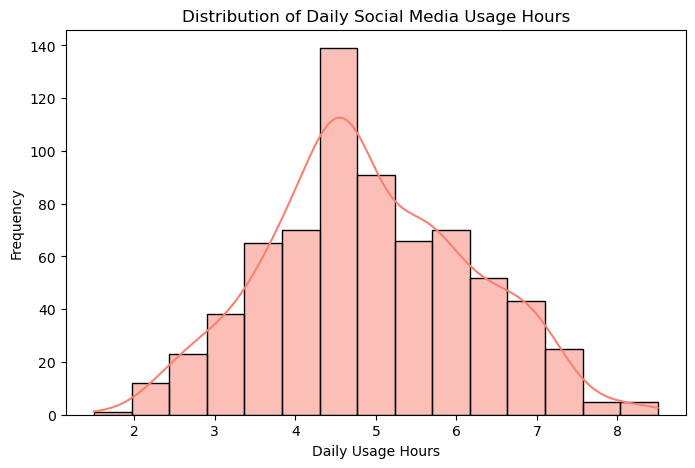

count    705.000000
mean       4.918723
std        1.257395
min        1.500000
25%        4.100000
50%        4.800000
75%        5.800000
max        8.500000
Name: Avg_Daily_Usage_Hours, dtype: float64

In [ ]:
# Plot the distribution of daily usage hours
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Daily Social Media Usage Hours')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()
# Show summary statistics for daily usage hours
df['Avg_Daily_Usage_Hours'].describe()


Correlation between Avg Daily Usage Hours and Addicted Score: 0.83


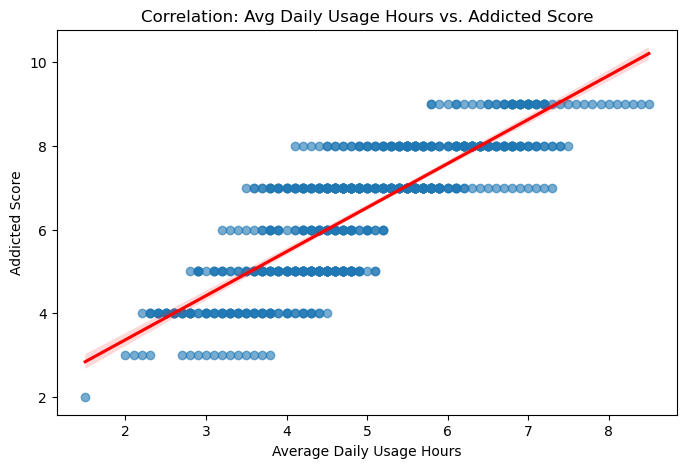

In [45]:
# Calculate and display the correlation between Avg Daily Usage Hours and Addicted Score
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score'])
print(f"Correlation between Avg Daily Usage Hours and Addicted Score: {correlation:.2f}")

# Optional: Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Avg_Daily_Usage_Hours',
    y='Addicted_Score',
    data=df,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Correlation: Avg Daily Usage Hours vs. Addicted Score')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addicted Score')
plt.show()

very normal distributions for both graphs.

NOTE: there is a high correlation between both variables but we can clearly see that this is not the only impactfull variable, givent that students with 3 to 5 hours of daily usage could be in a 4/5/6/7 of addicted score.


In [30]:
df['Country'].unique()

array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Germany', 'Brazil', 'Japan', 'South Korea', 'France', 'Spain',
       'Italy', 'Mexico', 'Russia', 'China', 'Sweden', 'Norway',
       'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
       'Portugal', 'Greece', 'Ireland', 'New Zealand', 'Singapore',
       'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia',
       'Taiwan', 'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt',
       'Morocco', 'South Africa', 'Nigeria', 'Kenya', 'Ghana',
       'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
       'Uruguay', 'Paraguay', 'Bolivia', 'Costa Rica', 'Panama',
       'Jamaica', 'Trinidad', 'Bahamas', 'Iceland', 'Finland', 'Poland',
       'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Croatia',
       'Serbia', 'Slovenia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Moldova', 'Belarus', 'Kazakhstan', 'Uzbekistan',
       'Kyrgyzstan', 'Tajikistan', 'A

In [46]:
df['Affects_Academic_Performance'].value_counts()


Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

In [48]:
# Correlation table: every variable vs. Addicted_Score

# Select only numeric columns for correlation
correlation_table = df.corr(numeric_only=True)

# Show correlation of all variables with Addicted_Score
correlation_with_addicted_score = correlation_table['Addicted_Score'].sort_values(ascending=False)
print(correlation_with_addicted_score)

Addicted_Score                 1.000000
Conflicts_Over_Social_Media    0.933586
Avg_Daily_Usage_Hours          0.832000
Student_ID                     0.041637
Age                           -0.166396
Sleep_Hours_Per_Night         -0.764858
Mental_Health_Score           -0.945051
Name: Addicted_Score, dtype: float64
